In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# NLTK stopwords download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [84]:
df = pd.read_csv('Whatts_appchat.csv')

In [85]:
# Stripping off any leading/trailing spaces from the column headers
df.columns = df.columns.str.strip()

In [86]:
# Stripping spaces from the Date column
df['Date'] = df['Date'].str.strip()

In [87]:
# Dropping rows with NaT in 'Date' or NaT in 'Time'
df.dropna(subset=['Date', 'Time'], inplace=True)

In [88]:
# Converting 'Message' column to string and removing NaN values
df['Message'] = df['Message'].astype(str)
df.dropna(subset=['Message'], inplace=True)

In [89]:

# 1. Comparison of messages sent between two participants
participant1 = 'Makesh'  
participant2 = 'Monikaa ME Csc' 

participant1_messages = df[df['Sender'] == participant1]
participant2_messages = df[df['Sender'] == participant2]

participant1_message_count = len(participant1_messages)
participant2_message_count = len(participant2_messages)

print(f"\nComparison of messages sent between {participant1} and {participant2}:")
print(f"{participant1}: {participant1_message_count} messages")
print(f"{participant2}: {participant2_message_count} messages")


Comparison of messages sent between Makesh and Monikaa ME Csc:
Makesh: 807 messages
Monikaa ME Csc: 1154 messages


In [90]:
print(df.columns)

Index(['Date', 'Time', 'Sender', 'Message'], dtype='object')


In [91]:
if 'Sender' in df.columns:
    participant1_messages = df[df['Sender'] == participant1]
    participant2_messages = df[df['Sender'] == participant2]
else:
    print("Column 'Sender' not found in DataFrame.")

In [92]:
print(df.head())

       Date   Time          Sender                     Message
0  09/24/23  19:55  Monikaa ME Csc                          Hi
1  09/24/23  19:55  Monikaa ME Csc            This is Monikaa.
2  09/24/23  22:08          Makesh            Hi myself makesh
3  09/24/23  22:09          Makesh                     Are u ?
4  09/24/23  22:11  Monikaa ME Csc  Will we have clg tomorrow?


In [93]:
# 2. Day with most messages
df['Date'] = pd.to_datetime(df['Date'])

# Extract just the date part (if needed) or keep it as datetime
df['Date'] = df['Date'].dt.date  # Use this line if you want only the date part

# Find the most active day
most_active_day = df['Date'].value_counts().idxmax()

print("\nDay with the most activity:", most_active_day)


Day with the most activity: 2024-03-02


C:\Users\shree\AppData\Local\Temp\ipykernel_4936\2686336517.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [95]:
#3. Most active time during the day
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')  # Adjust format as necessary

# Now you can access the hour
df['Hour'] = df['Time'].dt.hour

# Example of printing the first few hours
print(df[['Time', 'Hour']].head())

                 Time  Hour
0 1900-01-01 19:55:00    19
1 1900-01-01 19:55:00    19
2 1900-01-01 22:08:00    22
3 1900-01-01 22:09:00    22
4 1900-01-01 22:11:00    22


In [96]:
# commonly used words
stop_words = set(stopwords.words('english'))
def preprocess_message(message):
    message = re.sub(r'[^\w\s]', '', message).lower()
    return message

In [97]:
# Combining all messages into a single string
all_messages = ' '.join(df['Message'].apply(preprocess_message))

In [98]:
# Tokenizing the string into words. Magic happens here!
words = all_messages.split()

In [99]:
# Removing stopwords
words = [word for word in words if word not in stop_words]

In [100]:
# Counting the frequency of each word using built-in Counter for efficiency
word_freq = Counter(words)

# Get the 20 most common words. You can filter out some words if needed e.g. yes, no, ok, etc.
most_common_words = word_freq.most_common(20)
print("\nMost Commonly Used Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most Commonly Used Words:
media: 268
omitted: 268
la: 100
ah: 75
na: 63
ok: 55
bro: 55
enna: 54
thon: 36
ne: 36
message: 34
da: 32
u: 31
ama: 31
question: 29
oh: 27
illa: 27
ku: 26
send: 26
clg: 24


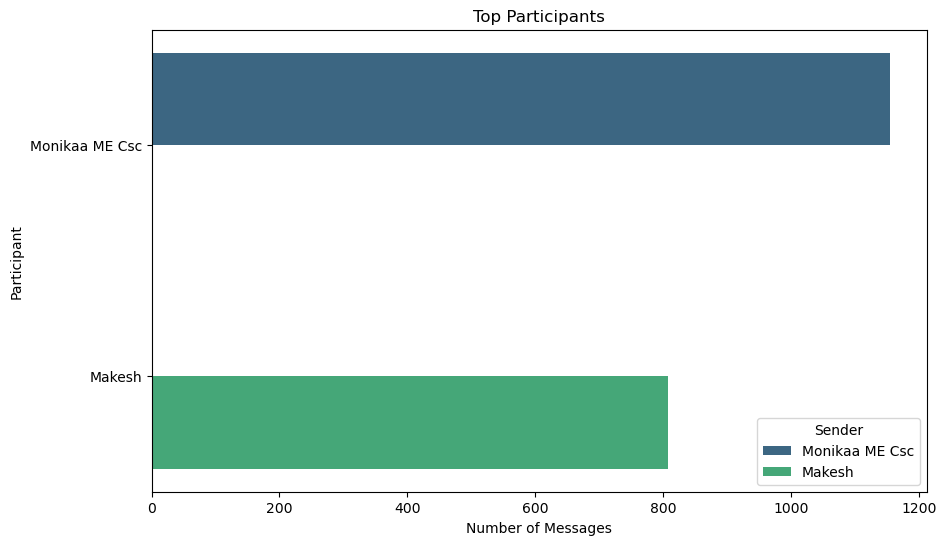

In [101]:
# Plotting the participants
top_participants = df['Sender'].value_counts().nlargest(2)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_participants.values, y=top_participants.index, palette='viridis', hue=top_participants.index)
plt.title('Top Participants')
plt.xlabel('Number of Messages')
plt.ylabel('Participant')
plt.show()

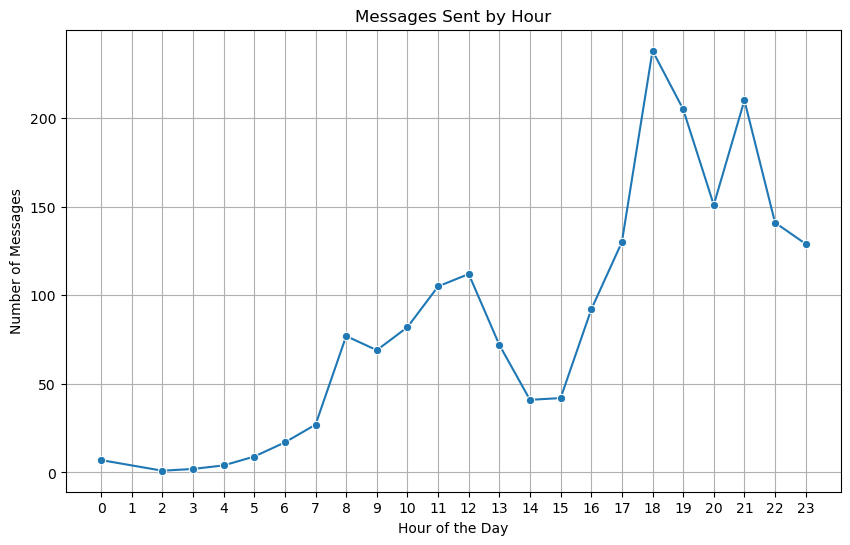

In [102]:
# Message count by hour
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Messages Sent by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

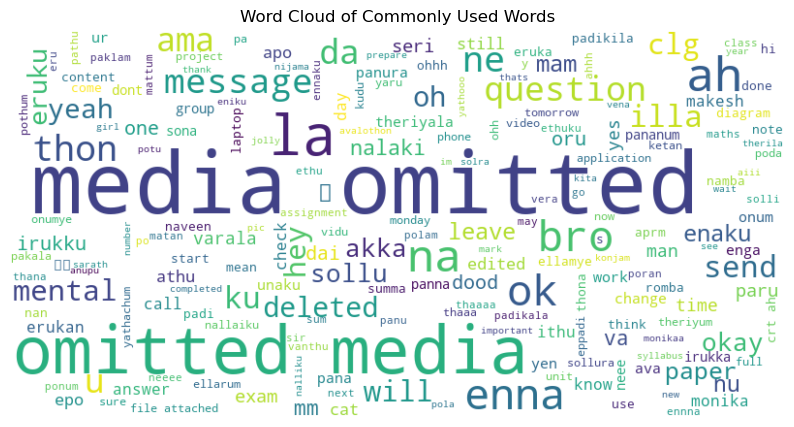

In [103]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Commonly Used Words')
plt.show()

In [104]:
# Total "media" counts for both participants
participant1_college_count = participant1_messages['Message'].str.contains('media', case=False).sum()
participant2_college_count = participant2_messages['Message'].str.contains('media', case=False).sum()

print(f"\nTotal 'media' counts:")
print(f"{participant1}: {participant1_college_count}")
print(f"{participant2}: {participant2_college_count}")


Total 'media' counts:
Makesh: 65
Monikaa ME Csc: 203


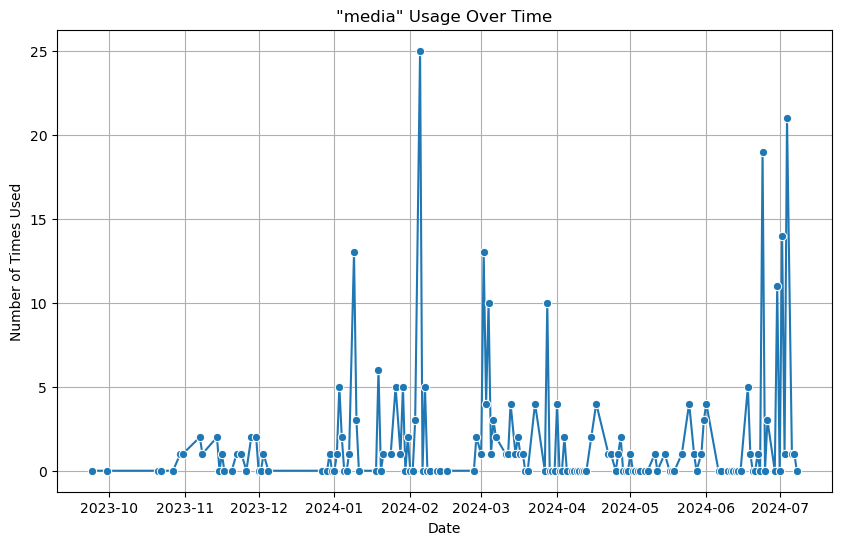

In [105]:
# Show "media" usage over time
df['media'] = df['Message'].str.contains('media', case=False)
college_counts = df.groupby('Date')['media'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=college_counts.index, y=college_counts.values, marker='o')
plt.title('"media" Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Times Used')
plt.grid(True)
plt.show()

In [114]:
# Total "media" counts for both participants
participant1_college_count = participant1_messages['Message'].str.contains('omitted', case=False).sum()
participant2_college_count = participant2_messages['Message'].str.contains('omitted', case=False).sum()

print(f"\nTotal 'omitted' counts:")
print(f"{participant1}: {participant1_college_count}")
print(f"{participant2}: {participant2_college_count}")


Total 'omitted' counts:
Makesh: 65
Monikaa ME Csc: 203


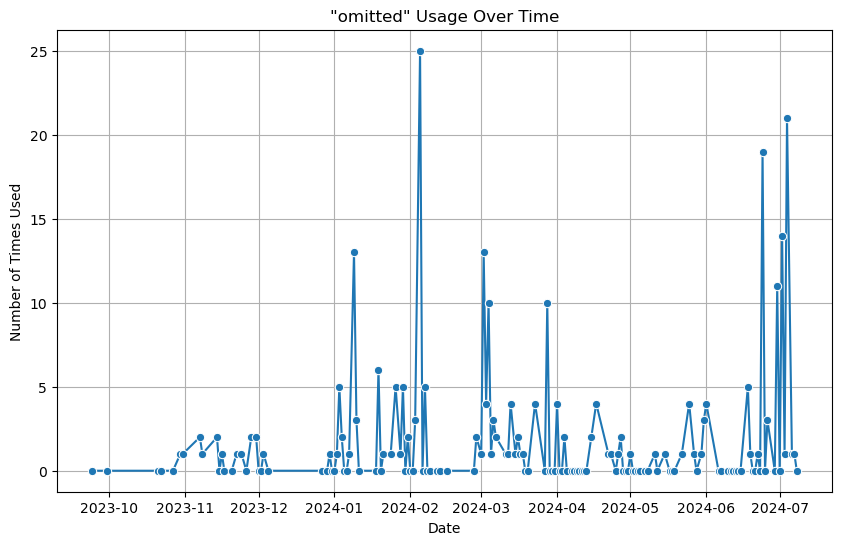

In [115]:
# Show "media" usage over time
df['omitted'] = df['Message'].str.contains('omitted', case=False)
college_counts = df.groupby('Date')['omitted'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=college_counts.index, y=college_counts.values, marker='o')
plt.title('"omitted" Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Times Used')
plt.grid(True)
plt.show()

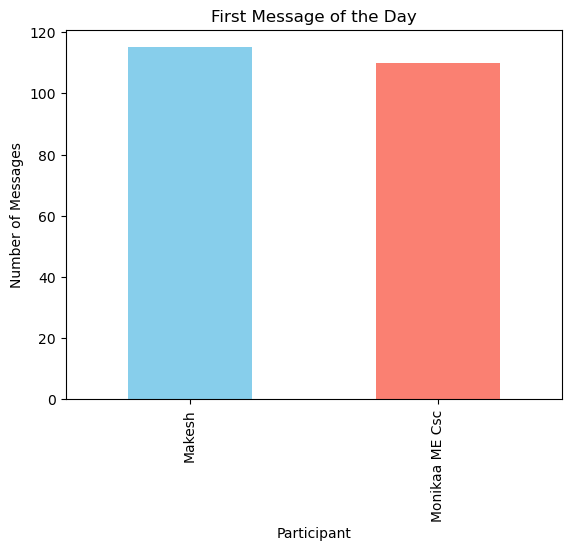

In [106]:
# Who sends the first message of the day more often?
first_message_counts = df.groupby('Date')['Time'].transform('min') == df['Time']
first_message_counts = df[first_message_counts]['Sender'].value_counts()
first_message_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('First Message of the Day')
plt.xlabel('Participant')
plt.ylabel('Number of Messages')
plt.show()

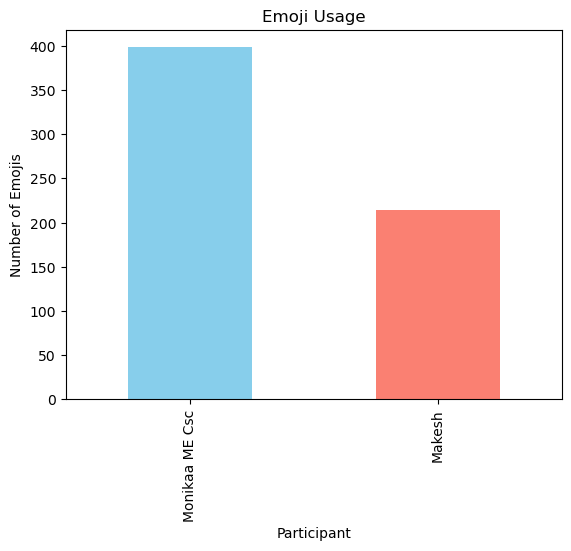

In [107]:
# Plot who uses emojis more
emoji_counts = df['Message'].str.contains(r'[^\w\s]')
emoji_counts = df[emoji_counts]['Sender'].value_counts()
emoji_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Emoji Usage')
plt.xlabel('Participant')
plt.ylabel('Number of Emojis')
plt.show()

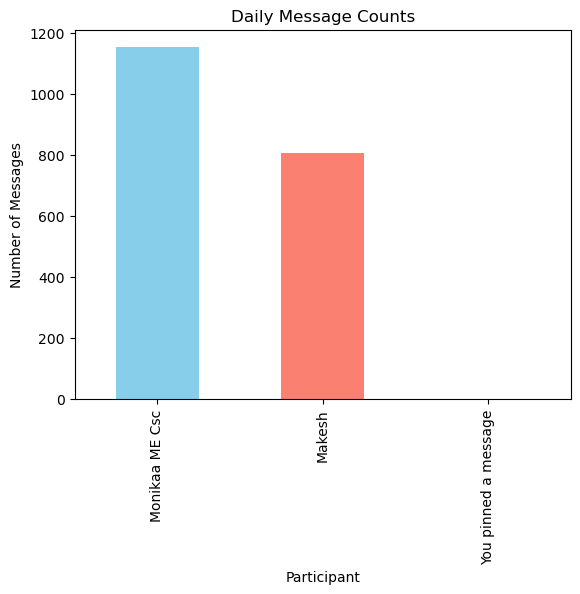

In [108]:
# Who is consistently more active?
daily_message_counts = df['Sender'].value_counts()
daily_message_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Daily Message Counts')
plt.xlabel('Participant')
plt.ylabel('Number of Messages')
plt.show()

In [109]:
# Who uses emojis more often?
participant1_emojis = participant1_messages['Message'].str.contains(r'[^\w\s]').sum()
participant2_emojis = participant2_messages['Message'].str.contains(r'[^\w\s]').sum()

print(f"\nTotal Emojis Used:")
print(f"{participant1}: {participant1_emojis}")
print(f"{participant2}: {participant2_emojis}")


Total Emojis Used:
Makesh: 214
Monikaa ME Csc: 398


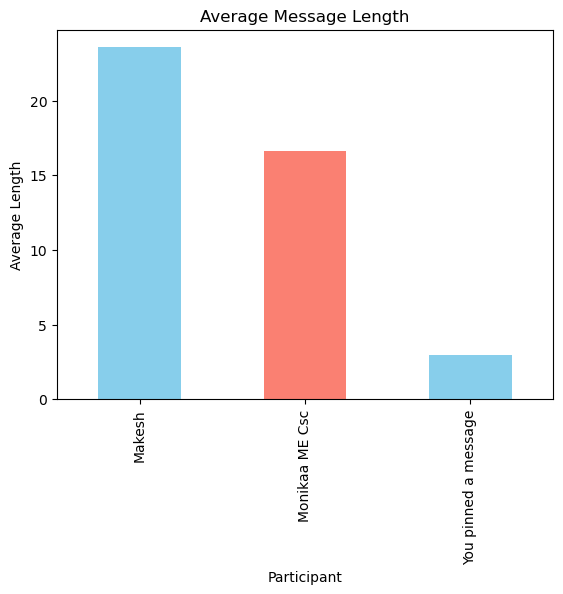

In [110]:
# Who sends longer messages?
df['MessageLength'] = df['Message'].str.len()
avg_message_length = df.groupby('Sender')['MessageLength'].mean()
avg_message_length.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Message Length')
plt.xlabel('Participant')
plt.ylabel('Average Length')
plt.show()

In [111]:
# Who has a bigger vocabulary?
unique_words = set(words)
participant1_vocab = len(participant1_messages['Message'].str.split().explode().unique())
participant2_vocab = len(participant2_messages['Message'].str.split().explode().unique())

print(f"\nUnique Words Used:")
print(f"{participant1}: {participant1_vocab}")
print(f"{participant2}: {participant2_vocab}")


Unique Words Used:
Makesh: 1266
Monikaa ME Csc: 1246


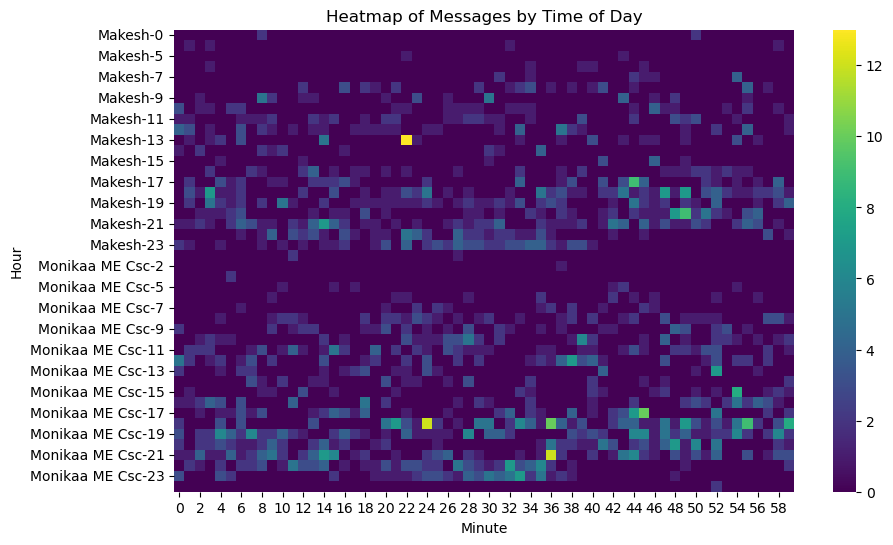

In [112]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Plotting the heatmap
heatmap = df.groupby(['Sender', 'Hour', 'Minute']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, cmap='viridis')
plt.title('Heatmap of Messages by Time of Day')
plt.xlabel('Minute')
plt.ylabel('Hour')
plt.show()

In [113]:
# Number of average messages sent per day
average_messages_per_day = df['Date'].value_counts().mean()
print("\nAverage number of messages sent per day:", average_messages_per_day)


Average number of messages sent per day: 13.086666666666666
